<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/intro-Machine-Learning/blob/main/examples_bank/6_clasificacion/asignacion_parcial_2_regresion_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

# Clasificación binaria con el dataset de florez de iris 

## [Video de apoyo](https://www.youtube.com/watch?v=mny9T2esp4A)

# Dataset inicial: load_iris  

# TAREA  

Caso 1: Constuir un clasificador binario detector de virginica  (One_vs_Rest)  
Caso 2: Constuir un clasificador binario versicolor vs virginica  (One_vs_One)

# ATRIBUTOS  
Caso 1:  
atributo 1: Longitud de sépalo  
atributo 2: ancho de sépalo  

Caso 2:  
atributo 1: Longitud de pétalo  
atributo 2: ancho de pétalo  

Caso 3:  
atributo 1: Producto entre longitud y ancho de sépalo  
atributo 2: Producto entre longitud y ancho de pétalo  

# MODELOS  
Caso 1: SGDClassifier y LogisticRegression  
Caso 2: SGDClassifier y KNeighborsClassifier  
Caso 3: LogisticRegression y KNeighborsClassifier  

Parciales:  
{TAREA: Caso 1, ATRIBUTOS: Caso 1, MODELOS: Caso 1}    
{TAREA: Caso 1, ATRIBUTOS: Caso 1, MODELOS: Caso 2}   
{TAREA: Caso 1, ATRIBUTOS: Caso 1, MODELOS: Caso 3}   
{TAREA: Caso 1, ATRIBUTOS: Caso 2, MODELOS: Caso 1}   
{TAREA: Caso 1, ATRIBUTOS: Caso 2, MODELOS: Caso 2}     
{TAREA: Caso 1, ATRIBUTOS: Caso 2, MODELOS: Caso 3}     
{TAREA: Caso 1, ATRIBUTOS: Caso 3, MODELOS: Caso 1}     
{TAREA: Caso 1, ATRIBUTOS: Caso 3, MODELOS: Caso 2}     
{TAREA: Caso 1, ATRIBUTOS: Caso 3, MODELOS: Caso 3}    
{TAREA: Caso 2, ATRIBUTOS: Caso 1, MODELOS: Caso 1}    
{TAREA: Caso 2, ATRIBUTOS: Caso 1, MODELOS: Caso 2}   
{TAREA: Caso 2, ATRIBUTOS: Caso 1, MODELOS: Caso 3}     
{TAREA: Caso 2, ATRIBUTOS: Caso 2, MODELOS: Caso 1}     
{TAREA: Caso 2, ATRIBUTOS: Caso 2, MODELOS: Caso 2}     
{TAREA: Caso 2, ATRIBUTOS: Caso 2, MODELOS: Caso 3}     
{TAREA: Caso 2, ATRIBUTOS: Caso 3, MODELOS: Caso 1}     
{TAREA: Caso 2, ATRIBUTOS: Caso 3, MODELOS: Caso 2}     
{TAREA: Caso 2, ATRIBUTOS: Caso 3, MODELOS: Caso 3}     



# Paso a paso 

## Punto 1

*  Tome el dataset `load_iris` y constituya el arreglo de imágenes $\mathbf{X}$ y el de etiquetas $\mathbf{y}$ como arreglos de numpy de valores de tipo `float64`.   

*  Divida el dataset `(X,y)` en cuatro subconjuntos `X_train, X_test, y_train, y_test` para entrenamiento y prueba del modelo predictivo de clasificación que se le asigne, pero para esta tarea relice muestreo estratificado utilizando la clase `StratifiedShuffleSplit` del `model_selection` de Sklearn. 

## Punto 2

* Después de haber seleccionado los atributos predictores asignados, escale los datos utilizando la clase `MaxMinScaler` o la clase `StandardScaler` del módulo `preprocessing` de sklearn. 

* Instancie y entrene los modelos asignados.   

## Punto 3 

Para la selección de modelos utilice la metodología de validación cruzada y para esta puntuación utilice la función `cross_val_predict` del módulo `model_selection` de sklearn con 10 hojas de validación(`cv = 10`).

y mida el desempeño en el conjunto de entrenamiento con la función `f1_score` del módulo `metrics` de Sklearn. 

 

 y luego afine el modelo seleccionado con la metodología de Grilla de hiperparámetros (`GridSearchCV(scoring = 'f1_macro'`)). 

* Para el `SGDClassifier` utilice los hiperparámetros:
  * `alpha` con valores `[10**-1, 10**-2]`, 
  * `learning_rate` con valores en la lista `['constant']`, 
  * `eta0` con valores en la lista `[0.1,0.01, 0.001]` y 
  * `penalty` con valores en la lista `['l1', 'l2']`.

* Para el `KNeighborsClassifier` utilice los hiperparámetros:
  * `n_neighbors` con valores en la lista `[3,4,5,6,7]`, 
  * `weights` con valores en la lista `['uniform', 'distance']`.

* Para `LogisticRegression` utilice los hiperparámetros:
  * `penalty` con valores en la lista `['l2']`, y  
  * `C` con valores en la lista `[10**0, 10**-1, 10**-2]`. 

* Capture el mejor modelo utilizando el atributo de inspección `best_estimator_`

## Punto 4

* Verifique que el desempeño en el conjunto de testeo es cercano al determinado en el conunto de entrenamiento.   

* cuantifique el desmpeño de su modelo final en el conjunto de testeo usando el método `f1_score(y_test, y_test_pred)`

# Solución del Caso I

{TAREA: Caso 1, ATRIBUTOS: Caso 1, MODELOS: Caso 1}    
Constuir un clasificador binario detector de **virginica**   
atributo 1: **Longitud de sépalo**  
atributo 2: **ancho de sépalo**   
Modelos: **SGDClassifier** y **LogisticRegression**  


# Librerías necesarias

In [42]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 

#obtención de datos 
from sklearn.datasets import load_iris 

# automatizar la selección de atributos 
from sklearn.base import BaseEstimator, TransformerMixin 

# muestreo estratificado
from sklearn.model_selection import StratifiedShuffleSplit

#modelos a seleccionar
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 

# para el criterio de selección de modelos
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score 

# para afinamiento del modelo
from sklearn.model_selection import GridSearchCV 


# Obtención de los datos 

In [3]:
X,y = load_iris(return_X_y = True) 

# Selección de los atributos predictores 

In [11]:
class selecciona_atributos(BaseEstimator, TransformerMixin):
    def __init__(self, sepal_length = True, sepal_width = True, \
                petal_length = False, petal_width = False):
        self.sepal_length = sepal_length
        self.sepal_width = sepal_width
        self.petal_length = petal_length
        self.petal_width = petal_width
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        sepal_length, sepal_width, petal_length, petal_width = 0,1,2,3
        if self.sepal_length:
            a = X[:,sepal_length]
        else:
            a = np.array([0])
        if self.sepal_width:
            b = X[:,sepal_width]
        else:
            b = np.array([0])
        if self.petal_length:
            c = X[:,petal_length]
        else:
            c = np.array([0])  
        if self.petal_width:
            d = X[:,petal_width]
        else:
            d = np.array([0])
        atributos = [a,b,c,d]  
        lista_atributos_seleccionados = []
        for atributo in atributos:
            if atributo.any():
                lista_atributos_seleccionados.append(atributo) 
        return np.c_[lista_atributos_seleccionados].T        

In [12]:
seleccionador_atributos = selecciona_atributos(sepal_length = True, sepal_width = True, \
                petal_length = True, petal_width = True)

In [13]:
X_selecionados = seleccionador_atributos.fit_transform(X)

In [14]:
X = X_selecionados

# Configuración de las etiquetas para un detector de vigínicas 

In [15]:
y_virginica = (y==2)

In [16]:
y = y_virginica 

# Dividir en entrenamiento y testeo de manera estratificada 

In [17]:
sss = StratifiedShuffleSplit(n_splits = 1, random_state = 42, test_size = 0.1 ) 

In [18]:
for train_index, test_index in sss.split(X,y):
    X_train,X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index] 

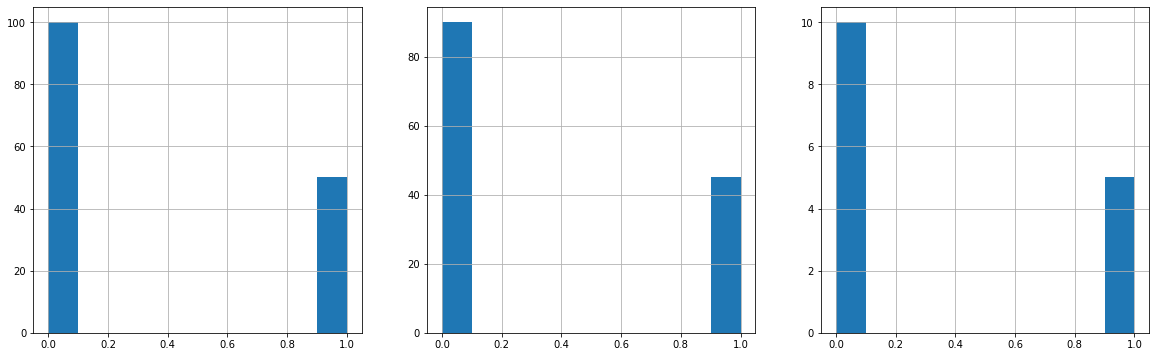

In [19]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,3, figsize = (20,6))

ax[0].hist(y*1)
ax[0].grid() 
ax[1].hist(y_train*1)
ax[1].grid() 
ax[2].hist(y_test*1) 
ax[2].grid() 

plt.savefig('estratificado.jpg')

plt.show() 

In [20]:
from sklearn.preprocessing import StandardScaler 

In [21]:
escalador = StandardScaler() 

In [22]:
escalador.fit(X_train)

StandardScaler()

In [23]:
X_train_escalado = escalador.transform(X_train) 

In [24]:
X_train= X_train_escalado 

In [25]:
sgd_clf = SGDClassifier(max_iter = 1000, random_state = 42, tol = 1e-3) 
lr_clf = LogisticRegression() 

In [26]:
sgd_clf.fit(X_train,y_train)
lr_clf.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train,y_train, cv = 10)
y_train_pred_lr = cross_val_predict(lr_clf, X_train,y_train, cv = 10)

In [28]:
f1_score(y_train,y_train_pred_sgd)


0.9545454545454545

In [29]:
f1_score(y_train,y_train_pred_lr)


0.9333333333333333

Tomaremos o seleccionaremos el modelo SGDClassifier como el mejor 

In [ ]:
grid_param_lr = {'penalty':['l2'],\
                'C':[10**0, 10**-1, 10**-2]}

#* Para `LogisticRegression` utilice los hiperparámetros:
#  * `penalty` con valores en la lista `['l2']`, y  
#  * `C` con valores en la lista `[10**0, 10**-1, 10**-2]`. 

In [30]:
grid_param_sgd = {'alpha':[10**-1, 10**-2], \
             'learning_rate':['constant'],\
             'eta0':[0.1,0.01, 0.001],
             'penalty':['l1', 'l2']}

# * Para el `SGDClassifier` utilice los pararámetros de `alpha` con valores `[10**-1, 10**-2]`,\
# `learning_rate` con valores en la lista `['constant']`, 
# `eta0` con valores en la lista `[0.1,0.01, 0.001]` y `penalty` con valores en la lista `['l1', 'l2']`.


In [ ]:
grid_param_knn = {'n_neighbors':[3,4,5,6,7],\
                 'weights':['uniform', 'distance']}

#Para el KNeighborsClassifier utilice los hiperparámetros:
#    n_neighbors con valores en la lista [3,4,5,6,7],
#    weights con valores en la lista ['uniform', 'distance'].



In [32]:
grid_search = GridSearchCV(sgd_clf, grid_param_sgd, cv = 10, scoring = 'f1_macro',\
                          return_train_score=True)

In [33]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [0.1, 0.01], 'eta0': [0.1, 0.01, 0.001],
                         'learning_rate': ['constant'],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1_macro')

In [34]:
mejor_modelo = grid_search.best_estimator_

In [35]:
y_train_pred_sgd = cross_val_predict(mejor_modelo, X_train,y_train, cv = 10)

In [36]:
f1_score(y_train, y_train_pred_sgd)

0.9565217391304347

In [37]:
X_test_escalado = escalador.transform(X_test)

In [39]:
y_test_pred_sgd = mejor_modelo.predict(X_test_escalado) 

In [40]:
f1_score(y_test,y_test_pred_sgd)

1.0

# Grafiquemos los datos y la recta clasificadora determinada

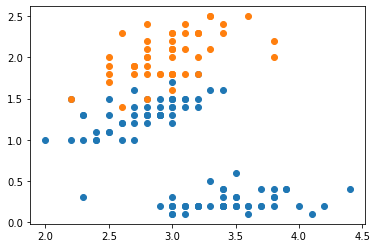

In [48]:
plt.scatter(X[:,1][y==False], X[:,3][y==False])
plt.scatter(X[:,1][y==True], X[:,3][y==True])

plt.savefig('mejor_predictores.jpg')

## Referentes:

* La clase LogisticRegression de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  

* La clase KNeighborsClassifier de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html